In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

seed =45
%matplotlib inline
plt.style.use('fivethirtyeight')

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
print('train shape',train.shape)
print('test shape',test.shape)

train shape (381109, 12)
test shape (127037, 11)


In [8]:
train.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [6]:
def getInfo(dataset):
    info = pd.DataFrame({'Nunuique':dataset.nunique(),'DataType':dataset.dtypes,'NullValues':dataset.isnull().sum()})
    return info
getInfo(train)

,Nunuique,DataType,NullValues
id,381109,int64,0
Gender,2,object,0
Age,66,int64,0
Driving_License,2,int64,0
Region_Code,53,float64,0
Previously_Insured,2,int64,0
Vehicle_Age,3,object,0
Vehicle_Damage,2,object,0
Annual_Premium,48838,float64,0
Policy_Sales_Channel,155,float64,0


In [6]:
train.describe()

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000
mean,190555.000000,38.822584,0.997869,26.388807,0.458210,30564.389581,112.034295,154.347397,0.122563
std,110016.836208,15.511611,0.046110,13.229888,0.498251,17213.155057,54.203995,83.671304,0.327936
min,1.000000,20.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.000000
25%,95278.000000,25.000000,1.000000,15.000000,0.000000,24405.000000,29.000000,82.000000,0.000000
50%,190555.000000,36.000000,1.000000,28.000000,0.000000,31669.000000,133.000000,154.000000,0.000000
75%,285832.000000,49.000000,1.000000,35.000000,1.000000,39400.000000,152.000000,227.000000,0.000000
max,381109.000000,85.000000,1.000000,52.000000,1.000000,540165.000000,163.000000,299.000000,1.000000


In [11]:
#train.isnull().sum()
k= pd.DataFrame()
k['train']= train.isnull().sum()
k['test'] = test.isnull().sum()
k.T

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
train,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
test,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN


Text(0.5, 0, 'Response')

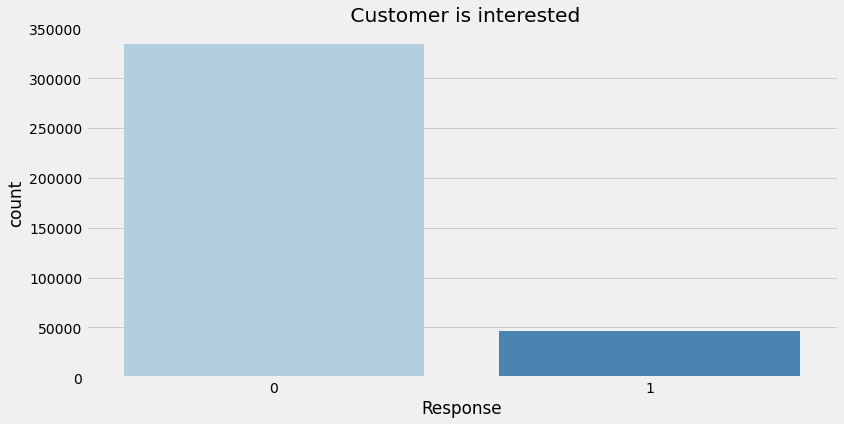

In [9]:
plt.figure(figsize=(12,6))
sns.countplot(train['Response'],palette='Blues')
plt.title(' Customer is interested')
plt.xlabel('Response')

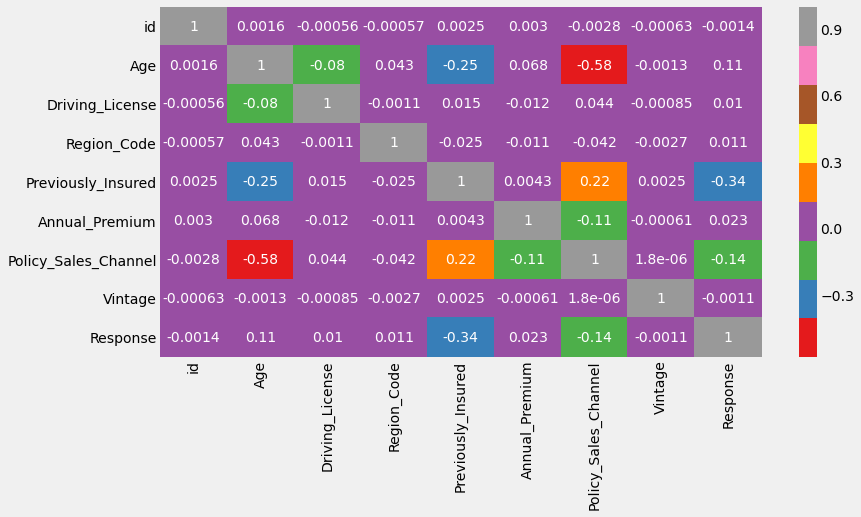

In [10]:
cor = train.corr()
plt.figure(figsize=(12,6))
sns.heatmap(cor,cmap='Set1',annot=True)

In [12]:
def category_type(df):
    col = df.columns
    for i in col:
        if df[i].nunique()<=7:
            df[i] = df[i].astype('category')
category_type(train)
category_type(test)

In [14]:
train.select_dtypes(include=['category']).head()

,Gender,Driving_License,Previously_Insured,Vehicle_Age,Vehicle_Damage,Response
0,Male,1,0,> 2 Years,Yes,1
1,Male,1,0,1-2 Year,No,0
2,Male,1,0,> 2 Years,Yes,1
3,Male,1,1,< 1 Year,No,0
4,Female,1,1,< 1 Year,No,0


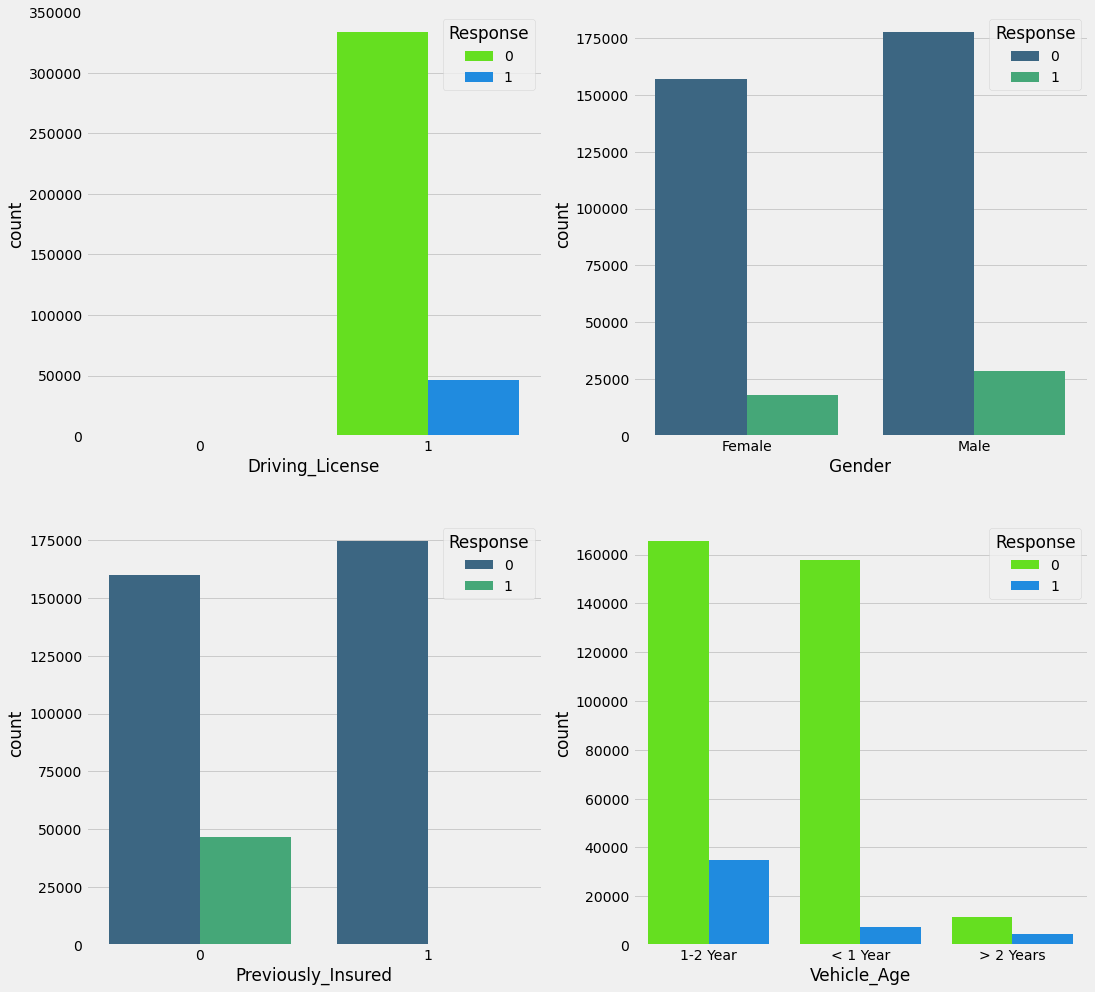

In [19]:
fig ,ax = plt.subplots(2,2,figsize=(16,16))
ax1,ax2,ax3,ax4= ax.flatten()
sns.countplot(data=train,x='Driving_License',hue='Response',palette='gist_rainbow',ax=ax1)
sns.countplot(data=train,x='Gender',hue='Response',palette='viridis',ax=ax2)
sns.countplot(data=train,x='Previously_Insured',hue='Response',palette='viridis',ax=ax3)
sns.countplot(data=train,x='Vehicle_Age',hue='Response',palette='gist_rainbow',ax=ax4)

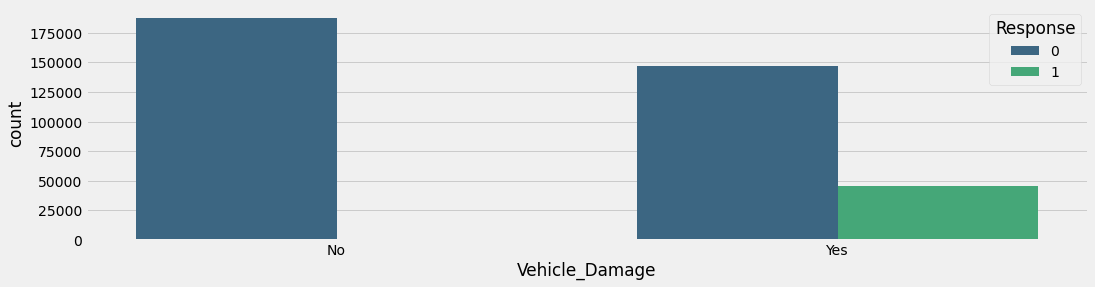

In [20]:
plt.figure(figsize=(16,4))
sns.countplot(data=train,x='Vehicle_Damage',hue='Response',palette='viridis')

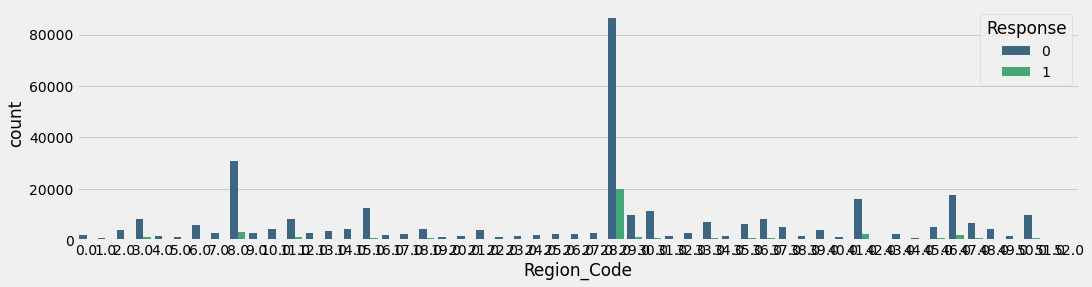

In [23]:
plt.figure(figsize=(16,4))
sns.countplot(data=train,x='Region_Code',hue='Response',palette='viridis')

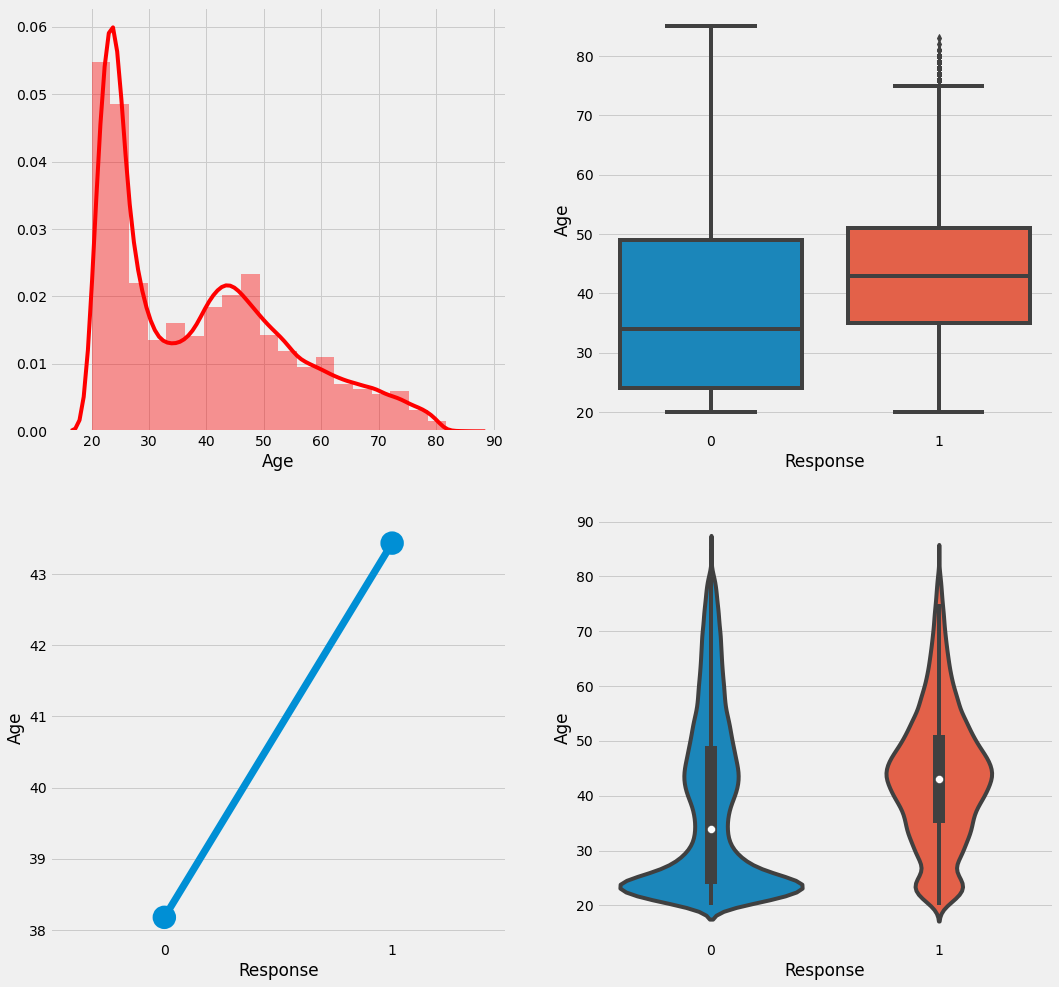

In [15]:
fig,ax = plt.subplots(2,2,figsize=(16,16))
ax1,ax2,ax3,ax4 = ax.flatten()
sns.distplot(train['Age'],bins=20,color='r',ax=ax1)
sns.boxplot(y='Age',x='Response',data=train,ax=ax2)
sns.pointplot(y='Age',x='Response',data=train,ax=ax3)
sns.violinplot(y='Age',x='Response',data=train,ax=ax4)

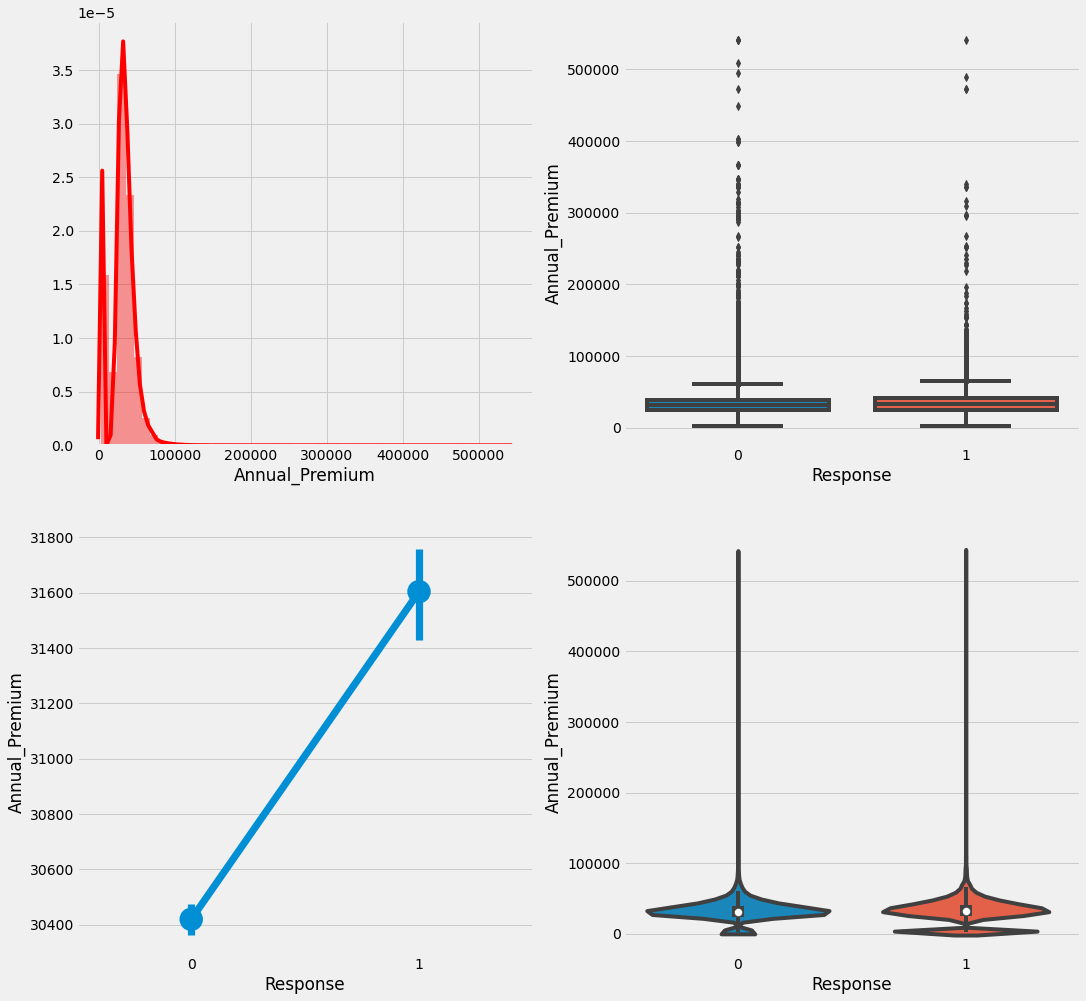

In [21]:
fig,ax = plt.subplots(2,2,figsize = (16,16))
ax1,ax2,ax3,ax4 = ax.flatten()
sns.distplot(train['Annual_Premium'],bins=50,color='r',ax=ax1)
sns.boxplot(y='Annual_Premium',x='Response',data=train,ax=ax2)
sns.pointplot(y='Annual_Premium',x='Response',data=train,ax=ax3)
sns.violinplot(y='Annual_Premium',x='Response',data=train,ax=ax4)

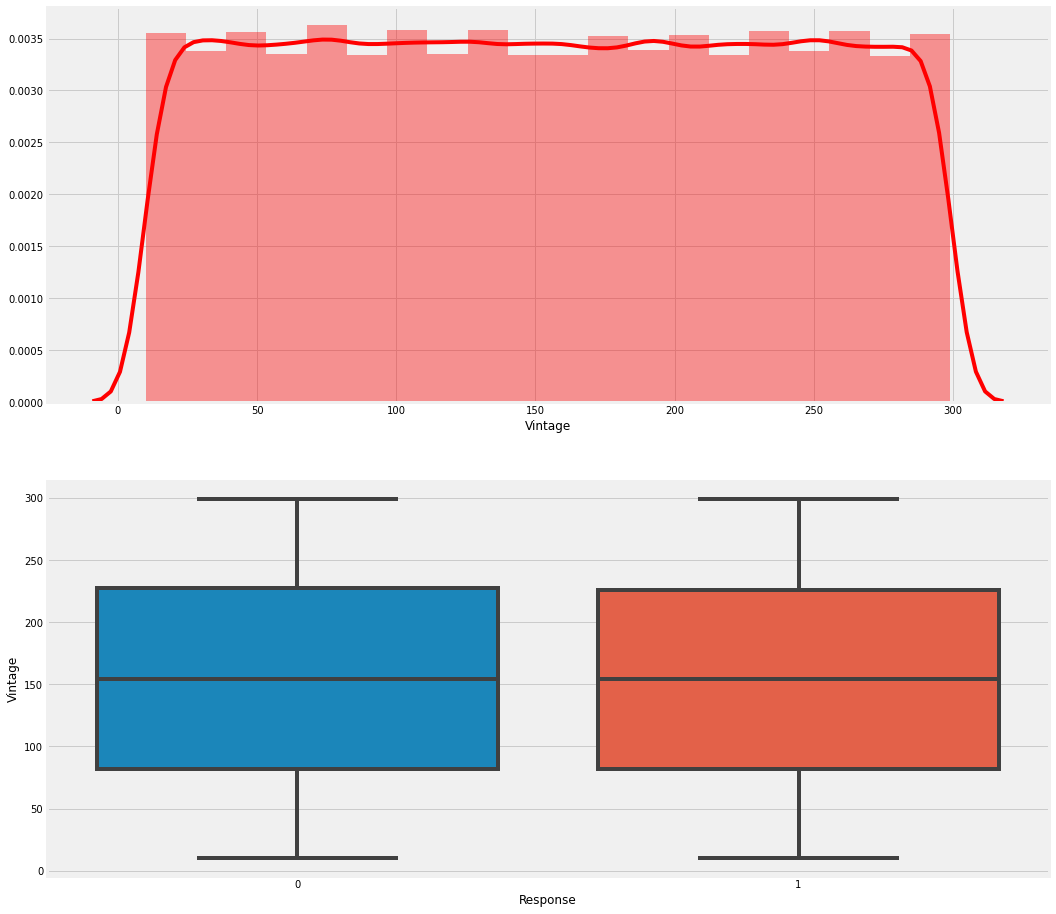

In [5]:
fig,ax = plt.subplots(2,1,figsize=(16,16))
ax1,ax2 = ax.flatten()
sns.distplot(train['Vintage'],bins=20,color='r',ax=ax1)
sns.boxplot(y='Vintage',x='Response',data=train,ax=ax2)
